In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
from scipy.io import loadmat
%matplotlib inline

colors = loadmat("../data/color150.mat")['colors'] ## Load colormap
def colorEncode(labelmap, colors):
    '''
    Encode label map with predefined color
    :param labelmap: label array
    :param colors:  Colors
    :return:  Colored RGB Image
    '''
    labelmap = labelmap.astype('int')
    labelmap_rgb = np.zeros((labelmap.shape[0], labelmap.shape[1], 3),
                            dtype=np.uint8)
    for label in np.unique(labelmap):
        if label < 0:
            continue
        labelmap_rgb += (labelmap == label)[:, :, np.newaxis] * \
            np.tile(colors[label],
                    (labelmap.shape[0], labelmap.shape[1], 1))
    return labelmap_rgb

In [2]:
img_prob = np.load("galvanize-1_prob.npy")

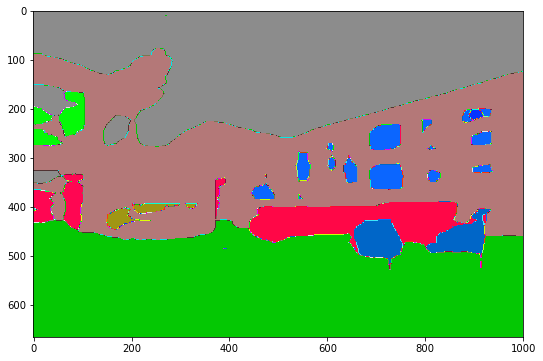

In [26]:
img = np.load("galvanize-1.npy")
img[img_prob < 0.2] = -1
imgc =  colorEncode(img, colors)
plt.figure(figsize=(10,6))
plt.imshow(imgc)

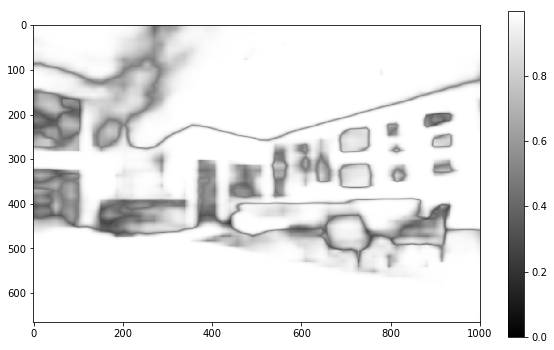

In [14]:
plt.figure(figsize=(10,6))
plt.imshow(img_prob, cmap = "gray")
plt.colorbar()